In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os 
import sklearn
import shap 
import time
import math
import seaborn as sns
import pathlib
import statistics

In [2]:
font_size_plot = 26
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['figure.labelweight'] = 'bold'
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['font.size'] = font_size_plot

path = os.path.abspath('')
os.chdir(f'{path}')

In [3]:
original_dataframe = pd.read_csv("C:\\User Files\\Coding\\Master Degree\\Combination Stack Research\\V4 (New Dataset)\\Dataset\\Supercapacitor V2.csv")
print(original_dataframe)

         SA    DG    %N     %O  %S   %P  %B    CD    CAP  CONC
0     343.5  0.84  2.30    NaN NaN  4.5 NaN   0.5  292.0   6.0
1     784.0  1.05  3.50   4.10 NaN  NaN NaN   0.5   98.0   1.0
2     784.0  1.05  3.50   4.10 NaN  NaN NaN  20.0   58.0   1.0
3     784.0  1.06  4.50   4.40 NaN  NaN NaN   0.5  104.0   1.0
4     784.0  1.06  4.50   4.40 NaN  NaN NaN  20.0   49.0   1.0
...     ...   ...   ...    ...  ..  ...  ..   ...    ...   ...
1084  571.0   NaN  9.50  11.81 NaN  NaN NaN   1.0  239.0   6.0
1085  544.0   NaN  8.47  11.77 NaN  NaN NaN   1.0  250.0   6.0
1086  373.0   NaN  6.36  15.91 NaN  NaN NaN   1.0  193.0   6.0
1087  460.0   NaN  7.84  14.40 NaN  NaN NaN   1.0  222.0   6.0
1088  413.0   NaN  7.30  10.73 NaN  NaN NaN   1.0  207.0   6.0

[1089 rows x 10 columns]


<Axes: >

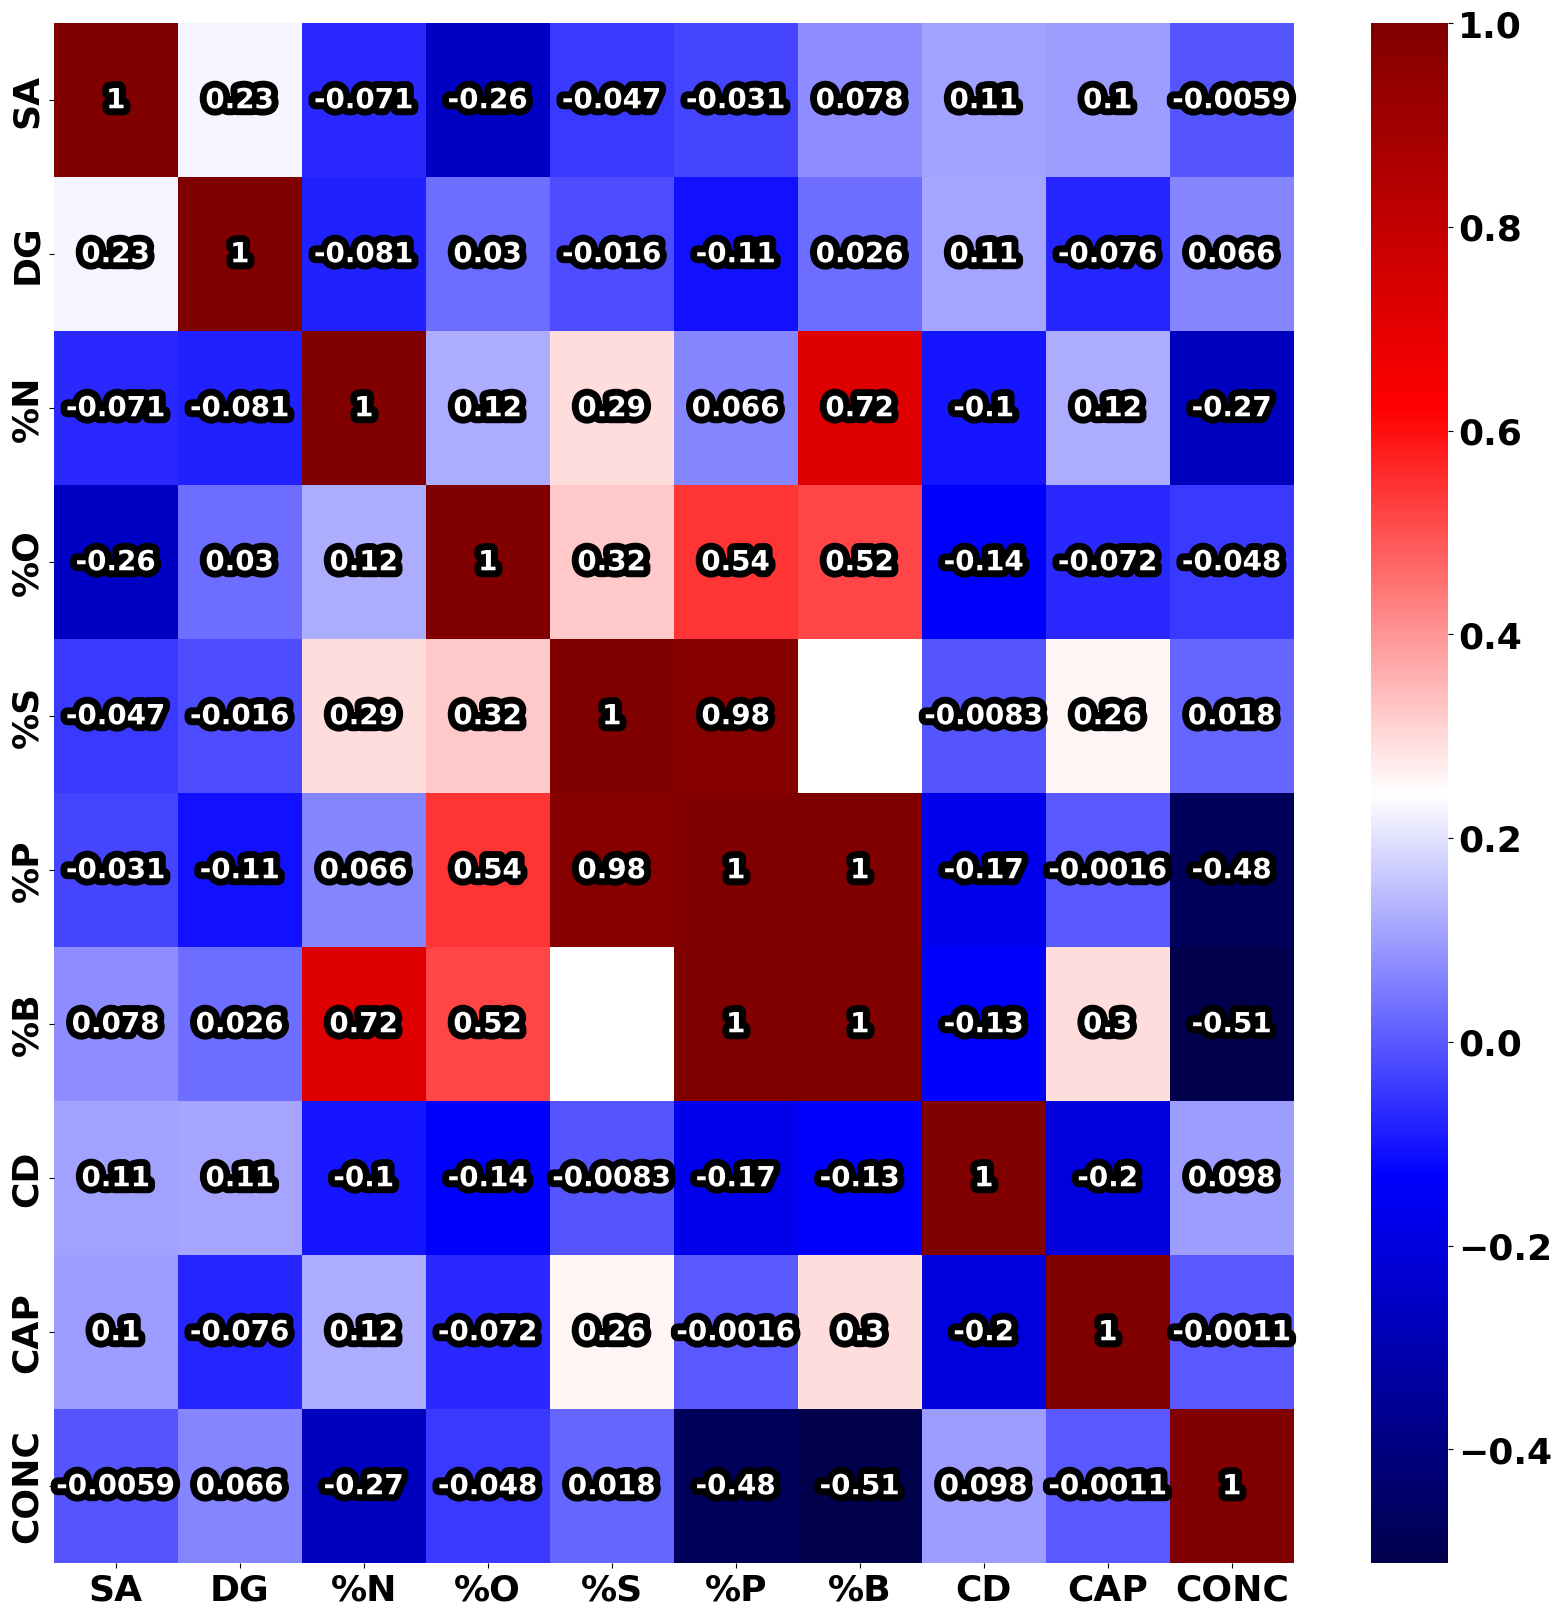

In [4]:
heatmap_fig = plt.figure(figsize=(20,20))
heatmap_ax = plt.subplot2grid((1,1),(0,0),fig=heatmap_fig)

corr_dataframe = original_dataframe.corr(method='pearson')
sns.heatmap(corr_dataframe,annot=True,ax=heatmap_ax,cmap='seismic',annot_kws={'fontsize':20,'path_effects':[matplotlib.patheffects.withStroke(linewidth=10, foreground='black')],'c':'white'})

KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.


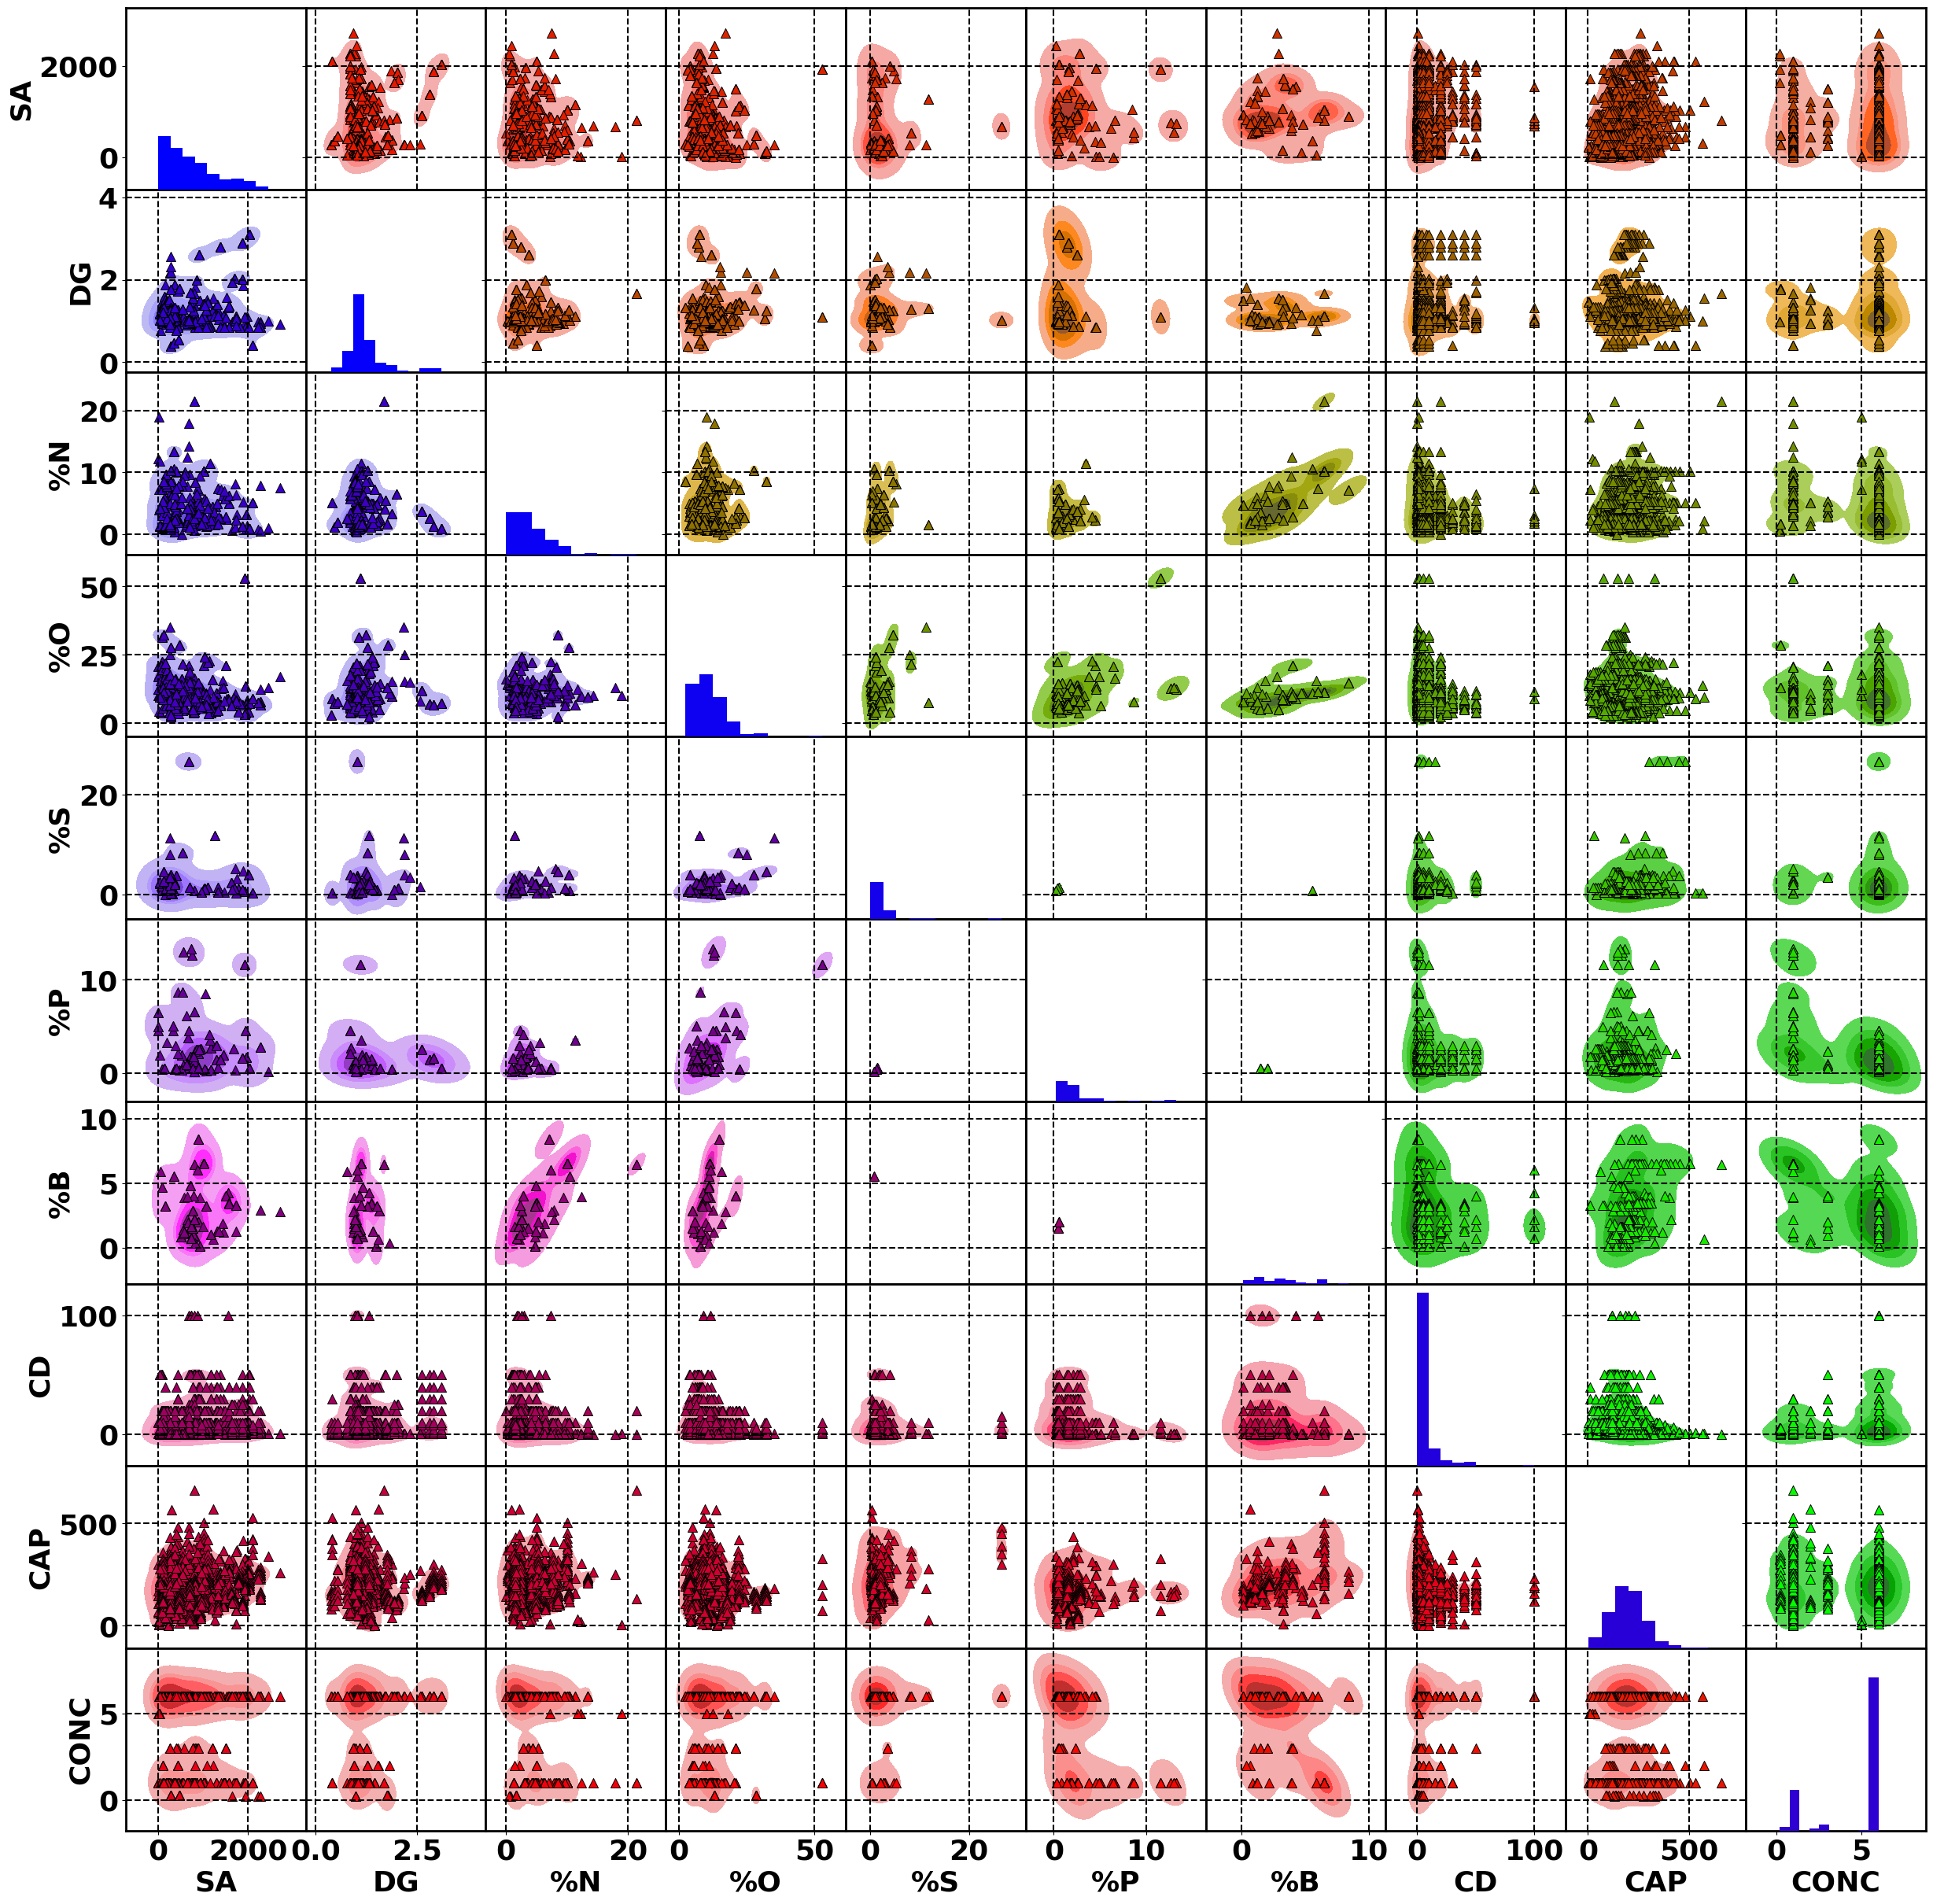

In [5]:
np.random.seed(1)

cmap = matplotlib.colormaps['brg'] # get cmap
amount_of_colors = int((len(original_dataframe.columns)**2))
colors_list = [cmap(x/amount_of_colors) for x in range(amount_of_colors)] # get each range of cmap
colors_iter = iter(colors_list)

repeat_colors_list = []

def kde_color(x,y,**kwargs):
    kwargs['color'] = next(colors_iter)
    repeat_colors_list.append(kwargs['color'])
    sns.kdeplot(x=x,y=y,fill=True,levels=5,**kwargs)
    plt.grid(which='major',color='black',linestyle='--',linewidth=1.5)

def scatter_color(x,y,**kwargs):
    kwargs['color'] = next(repeat_colors_iter)
    sns.scatterplot(x=x,y=y,s=75,edgecolors='black',marker='^',**kwargs)
    plt.grid(which='major',color='black',linestyle='--',linewidth=1.5)

def hist_color(x,**kwargs):
    kwargs['color'] = next(colors_iter)
    plt.hist(x=x,**kwargs)
#     plt.grid(which='majo4r',color='black',linestyle='--',linewidth=1.5)

plot = sns.PairGrid(original_dataframe,aspect=1)

plot.map_diag(hist_color)
plot.map_offdiag(kde_color)

repeat_colors_iter = iter(repeat_colors_list)

plot.map_offdiag(scatter_color)

for ax in plot.axes.flatten():

    ax.spines[['right','top','bottom','left']].set_visible(True)
    ax.spines[['right','top','bottom','left']].set_linewidth(2)

plt.subplots_adjust(wspace=0,hspace=0)

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


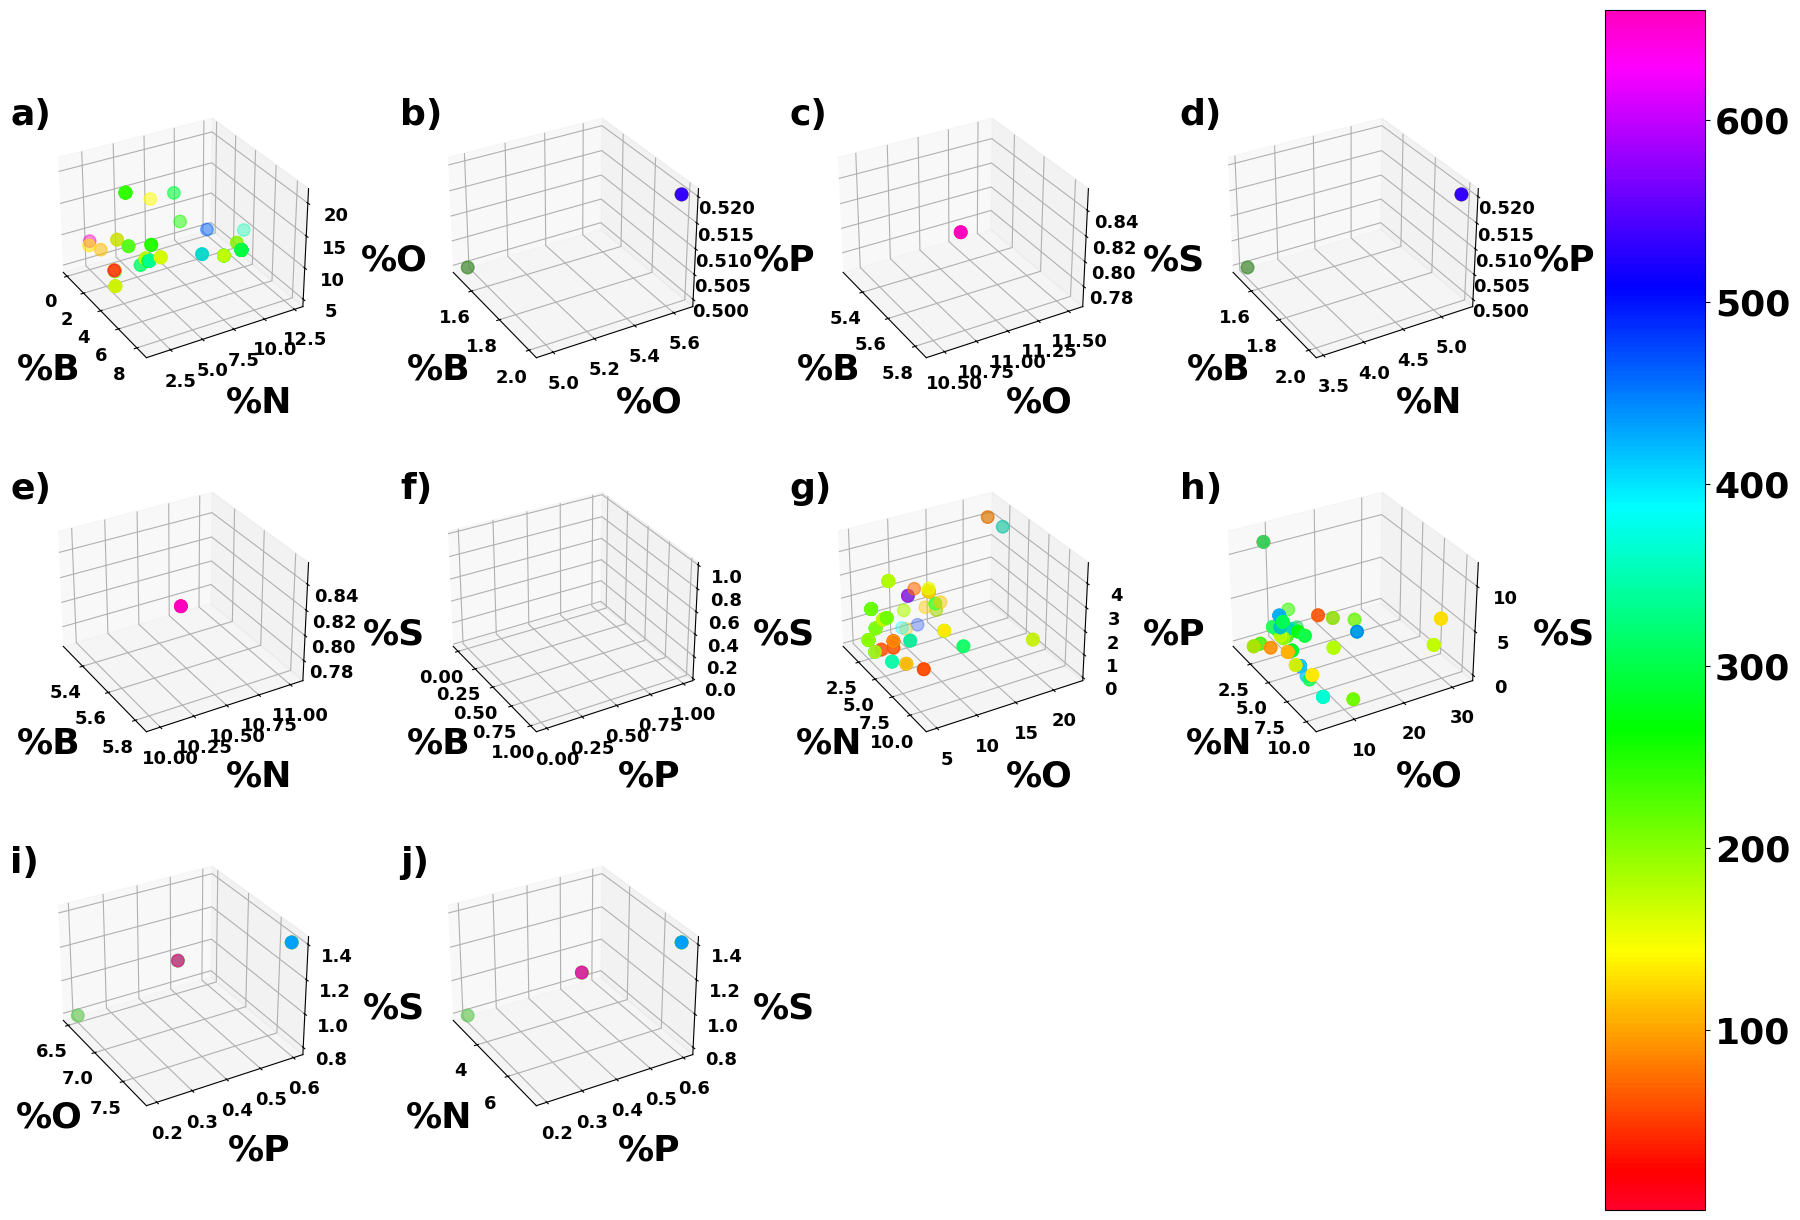

In [6]:
three_d_fig = plt.figure(figsize=(20,20))

element_list = ['%B','%O','%N','%P','%S']

depth = 3

def find_combination(element_list,passed_depth):

    element_combination_list = []

    def recursion_func(passed_depth,temp_list=[]):

        if passed_depth == 0:

            element_combination_list.append(temp_list)

        else:

            for element in element_list:

                recursion_func(passed_depth-1,temp_list+[element])

    recursion_func(passed_depth=passed_depth)
    
    return element_combination_list

combination_list = find_combination(element_list=element_list,passed_depth=depth)

no_duplicate_combination_list = []

for combination in combination_list:

    if len(set(combination)) == len(combination):

        combination.sort()

        no_duplicate_combination_list.append(combination)

combination_dataframe = pd.DataFrame(no_duplicate_combination_list,columns=[x for x in range(depth)]).drop_duplicates()
combination_dataframe = combination_dataframe.reset_index(drop=True)

max_row = 3
max_col = 4
current_row = 0
current_col = -1

for dataframe_row in combination_dataframe.index:

    current_col += 1

    if current_col == max_col:

        current_col = 0
        current_row += 1

    x = combination_dataframe.loc[dataframe_row][0]
    y = combination_dataframe.loc[dataframe_row][1]
    z = combination_dataframe.loc[dataframe_row][2]

    three_d_ax = plt.subplot2grid((max_row,max_col),(current_row,current_col),fig=three_d_fig,projection='3d')
    three_d_ax.scatter(xs=original_dataframe[x],ys=original_dataframe[y],zs=original_dataframe[z],c=original_dataframe['CAP'],cmap='gist_rainbow',s=80)

    three_d_ax.xaxis.set_tick_params(labelsize=13)
    three_d_ax.yaxis.set_tick_params(labelsize=13)
    three_d_ax.zaxis.set_tick_params(labelsize=13)

    three_d_ax.set_xlabel(x,labelpad=15)
    three_d_ax.set_ylabel(y,labelpad=15)
    three_d_ax.set_zlabel(z,labelpad=15)

    three_d_ax.view_init(azim=-30,elev=30,roll=0)

    ax_label = 'abcdefghijklmnopqrstuvwxyz'
    three_d_ax.text2D(x=-0.1,y=0.9,s=f'{ax_label[dataframe_row]})',transform=three_d_ax.transAxes,size=font_size_plot)

true_min = original_dataframe['CAP'].min()
true_max = original_dataframe['CAP'].max()

sm = plt.cm.ScalarMappable(cmap='gist_rainbow',norm=plt.Normalize(vmin=true_min,vmax=true_max))
sm.set_array([])
cbar_ax = three_d_fig.add_axes([0.82,0.2,0.05,0.6]) # [left,bottom,right,top]
three_d_fig.colorbar(sm,cax=cbar_ax)

three_d_fig.tight_layout(rect=[0,0.2,0.78,0.8]) # [left,bottom,right,top]

plt.subplots_adjust(wspace=0.4,hspace=0)

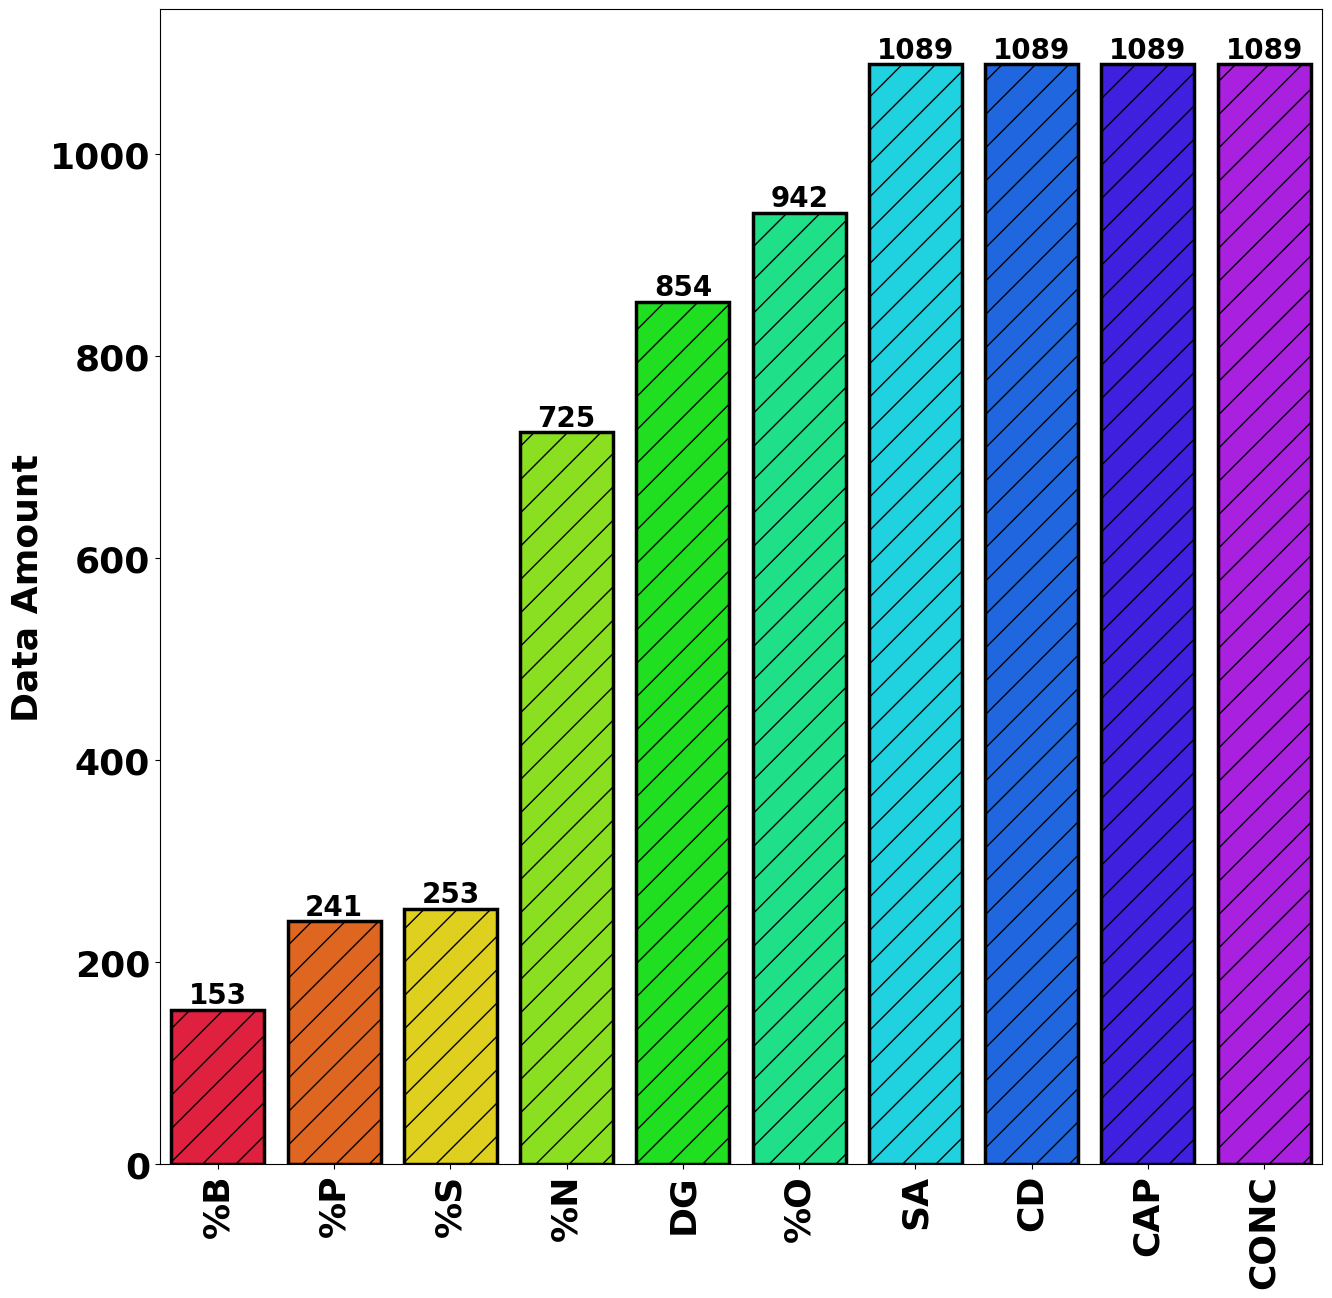

In [7]:
bar_plot_fig = plt.figure(figsize=(15,15))
bar_plot_ax = plt.subplot2grid((1,1),(0,0),fig=bar_plot_fig)
count_dataframe = original_dataframe.count().sort_values().to_frame().transpose()

color_map = plt.get_cmap('gist_rainbow')

color_list = [color_map(1*(x/len(count_dataframe.columns))) for x in range(len(count_dataframe.columns))]

barplot = sns.barplot(x=count_dataframe.columns,y=count_dataframe.iloc[0],ax=bar_plot_ax,palette=color_list,hue=count_dataframe.columns,linewidth=2.5,edgecolor='black',hatch='/')
barplot.set_xlabel('')
barplot.set_ylabel('Data Amount')
barplot.set_xticks(barplot.get_xticks())
barplot.xaxis.set_tick_params(rotation=90)

for container in bar_plot_ax.containers:

    bar_plot_ax.bar_label(container,fontsize=20)